# Crypto Clustering

In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
crypto_market_data_df = pd.read_csv("data/crypto_market_data.csv", index_col="coin_id")

crypto_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
crypto_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
crypto_market_data_df.hvplot.line(width=800, height=400, rot=90)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

# Data preparation

In [5]:
standard_scalar = StandardScaler()

In [6]:
scaled_crypto_market_data_df = crypto_market_data_df.copy()

numerical_columns = scaled_crypto_market_data_df.select_dtypes(include=["float64"]).columns
scaled_crypto_market_data_df[numerical_columns] = standard_scalar.fit_transform(scaled_crypto_market_data_df[numerical_columns])

scaled_crypto_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


# Scaled DataFrame

## Finding the best value for k

In [7]:
k_values = list(range(1,12))

k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
inertia_values = []

for k_value in k_values:
    
    kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)
    kmeans.fit(scaled_crypto_market_data_df)
    
    inertia_values.append(kmeans.inertia_)

In [9]:
scaled_elbow_df = pd.DataFrame({"k": k_values, "inertia": inertia_values})

scaled_elbow_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


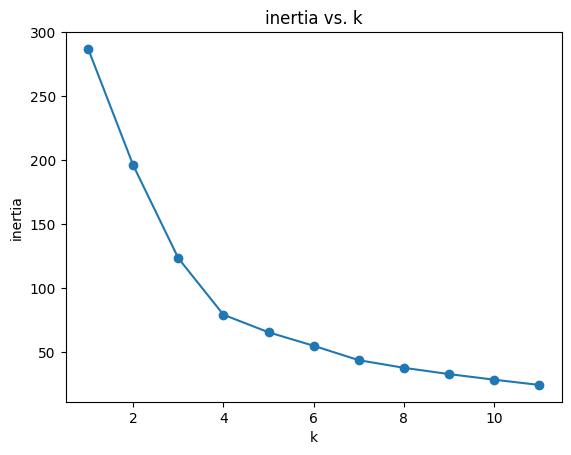

In [10]:
# figure
plt.plot(scaled_elbow_df["k"], scaled_elbow_df["inertia"], marker="o")

# formatting
plt.title("inertia vs. k")
plt.xlabel("k")
plt.ylabel("inertia")

# show
plt.show()

In [11]:
best_scaled_k = 4

print(f"best_scaled_k: {best_scaled_k}")

best_scaled_k: 4


## Clustering the cryptocurrencies with k-means

In [12]:
kmeans = KMeans(n_clusters=best_scaled_k, random_state=42, n_init=10)
kmeans.fit(scaled_crypto_market_data_df)

clusters = kmeans.predict(scaled_crypto_market_data_df)
print(f"clusters: {clusters}")

scaled_crypto_market_data_df["Clusters"] = clusters
scaled_crypto_market_data_df.head()

clusters: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [13]:
scaled_crypto_market_data_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Clusters",
    hover_cols=["coin_id"],
    title="Scaled Clusters"
)

:NdOverlay   [Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

## Optimizing the clusters with PCA (Principal Component Analysis)

In [14]:
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(crypto_market_data_df)
scaled_crypto_pca_df = pd.DataFrame(data=crypto_pca, columns=["PC1", "PC2", "PC3"])

scaled_crypto_pca_df.head()

,PC1,PC2,PC3
0,-341.800963,-51.366775,12.525471
1,-249.420466,24.117548,-14.231466
2,-402.614721,-118.710737,24.838397
3,-406.752437,-79.487286,1.566331
4,-382.429948,-103.431959,16.753073


In [15]:
explained_variance = pca.explained_variance_ratio_
print(f"explained_variance: {explained_variance}")

explained_variance: [9.76037313e-01 2.30282949e-02 7.48308214e-04]


In [16]:
scaled_crypto_pca_df["coin_id"] = crypto_market_data_df.index
scaled_crypto_pca_df = scaled_crypto_pca_df.set_index("coin_id")

scaled_crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


# Scaled PCA DataFrame

## Finding the best value for k

In [17]:
k_values = list(range(1,12))

k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [18]:
inertia_values = []

for k_value in k_values:
    
    kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)
    kmeans.fit(scaled_crypto_pca_df)
    
    inertia_values.append(kmeans.inertia_)

In [19]:
scaled_pca_elbow_df = pd.DataFrame({"k": k_values, "inertia": inertia_values})

scaled_pca_elbow_df.head()

,k,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.580721e+06
3,4,8.237471e+05
4,5,4.264175e+05


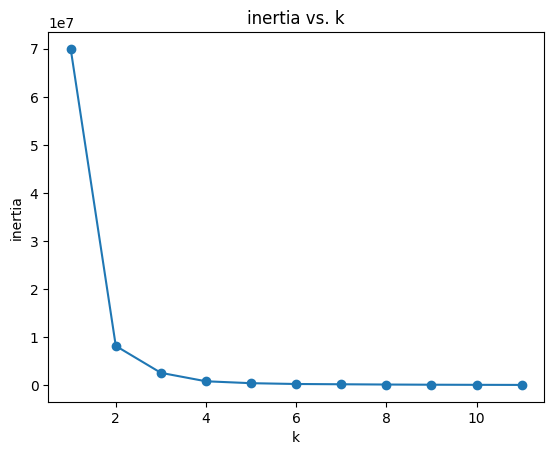

In [20]:
# figure
plt.plot(scaled_pca_elbow_df["k"], scaled_pca_elbow_df["inertia"], marker="o")

# formatting
plt.title("inertia vs. k")
plt.xlabel("k")
plt.ylabel("inertia")

# show
plt.show()

In [21]:
best_scaled_pca_k = 2

print(f"best_scaled_pca_k: {best_scaled_pca_k}")
print(f"best_scaled_pca_k({best_scaled_pca_k}) is the same as best_scaled_k({best_scaled_k}): {best_scaled_pca_k == best_scaled_k}")

best_scaled_pca_k: 2
best_scaled_pca_k(2) is the same as best_scaled_k(4): False


## Clustering the cryptocurrencies with k-means

In [22]:
kmeans = KMeans(n_clusters=best_scaled_k, random_state=42, n_init=10)
kmeans.fit(scaled_crypto_pca_df)

clusters = kmeans.predict(scaled_crypto_pca_df)
print(f"clusters: {clusters}")

scaled_crypto_pca_df["Clusters"] = clusters
scaled_crypto_pca_df.head()

clusters: [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


,PC1,PC2,PC3,Clusters
coin_id,,,,
bitcoin,-341.800963,-51.366775,12.525471,0
ethereum,-249.420466,24.117548,-14.231466,0
tether,-402.614721,-118.710737,24.838397,0
ripple,-406.752437,-79.487286,1.566331,0
bitcoin-cash,-382.429948,-103.431959,16.753073,0


In [23]:
scaled_crypto_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Clusters",
    hover_cols=["coin_id"],
    title="Scaled PCA Clusters"
)

:NdOverlay   [Clusters]
   :Scatter   [PC1]   (PC2,coin_id)

# Comparing DataFrames (Scaled vs. Scaled PCA)

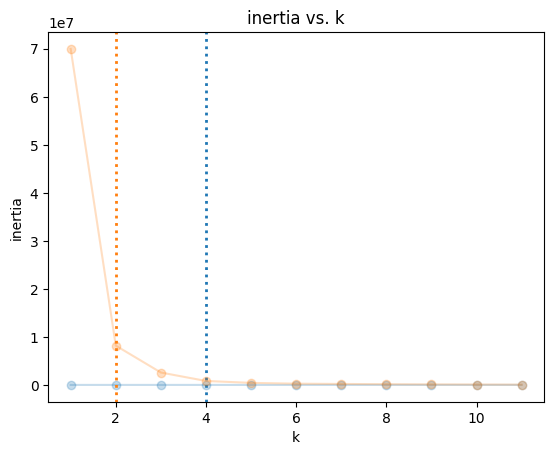

In [24]:
# figure
plt.plot(scaled_elbow_df["k"], scaled_elbow_df["inertia"], marker="o", alpha=.25)
plt.axvline(x=4, color="#1f77b4", linestyle=":", linewidth=2)

plt.plot(scaled_pca_elbow_df["k"], scaled_pca_elbow_df["inertia"], marker="o", alpha=.25)
plt.axvline(x=2, color="#ff7f0e", linestyle=":", linewidth=2)

# formatting
plt.title("inertia vs. k")
plt.xlabel("k")
plt.ylabel("inertia")

# show
plt.show()

In [25]:
scaled_cluster_plot = scaled_crypto_market_data_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Clusters",
    hover_cols=["coin_id"],
    title="Scaled Clusters"
)

scaled_pca_cluster_plot = scaled_crypto_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Clusters",
    hover_cols=["coin_id"],
    title="Scaled PCA Clusters"
)

(scaled_cluster_plot + scaled_pca_cluster_plot).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [Clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Clusters]
      :Scatter   [PC1]   (PC2,coin_id)

Scaled Clusters: the clusters are visible

Scaled PCA Clusters: the clusters are visible and separated